# Implementing Different Layers


We will illustrate how to use different types of layers in TensorFlow

下面介绍不同层的使用

The layers of interest are:
1. Convolutional Layer
2. Activation Layer 
3. Max-Pool Layer
4. Fully Connected Layer

We will generate two different data sets for this script, a 1-D data set (row of data) and a 2-D data set (similar to picture)

# 拼接

在2D图上，0轴相当于x轴，1轴相当于y轴；0轴拼接，就是0轴与0轴粘在一起；1轴拼接，就是1轴与1轴粘在一起

在3D图上，0轴是x轴（长），1轴是y轴（宽），2轴是z轴（高）

TensorFlow提供两种类型的拼接：

    tf.concat(values, axis, name='concat')：按照指定的已经存在的轴进行拼接

    tf.stack(values, axis=0, name='stack')：按照指定的新建的轴进行拼接

t1 = [[1, 2, 3], [4, 5, 6]]

t2 = [[7, 8, 9], [10, 11, 12]]

1. tf.concat([t1, t2], 0) ==> 

    [[1, 2, 3], 
    
     [4, 5, 6], 
     
     [7, 8, 9], 
     
     [10, 11, 12]]

2. tf.concat([t1, t2], 1) ==> 

    [[1, 2, 3, 7, 8, 9], 

      [4, 5, 6, 10, 11, 12]]



3. tf.stack([t1, t2], 0)  ==> 

   在0轴上拼接，先在t1 t2上建立0轴，0轴的长度为1, 

   [[[1, 2, 3], 
   
     [4, 5, 6]], 
     
    [[7, 8, 9], 
    
     [10, 11, 12]]]

4. tf.stack([t1, t2], 1)  ==> 

    [[[1, 2, 3], 
      [7, 8, 9]], 
      
     [[4, 5, 6], 
     [10, 11, 12]]]

5. tf.stack([t1, t2], 2)  ==> 
    [[[1, 7],     
    
      [2, 8], 
      
      [3, 9]], 
    
    [[4, 10], 
    
     [5, 11], 
     
     [6, 12]]]

我们从shape角度看一下就很容易明白了

t1 = [[1, 2, 3], [4, 5, 6]]

t2 = [[7, 8, 9], [10, 11, 12]]

tf.concat([t1, t2], 0)  # [2,3] + [2,3] ==> [4, 3]

tf.concat([t1, t2], 1)  # [2,3] + [2,3] ==> [2, 6]

tf.stack([t1, t2], 0)   # [2,3] + [2,3] ==> [2*,2,3] # 新建轴0，在轴0上拼接

tf.stack([t1, t2], 1)   # [2,3] + [2,3] ==> [2,2*,3]

tf.stack([t1, t2], 2)   # [2,3] + [2,3] ==> [2,3,2*]

# 抽取



    tf.slice(input_, begin, size, name=None)：按照指定的下标范围抽取连续区域的子集

    tf.gather(params, indices, validate_indices=None, name=None)：按照指定的下标集合从axis=0中抽取子集，适合抽取不连续区域的子集

input = [
         
         [[1, 1, 1], [2, 2, 2]],

         [[3, 3, 3], [4, 4, 4]],
         
         [[5, 5, 5], [6, 6, 6]]
       
       ]
         
tf.slice(input, [1, 0, 0], [1, 1, 3]) ==> [[[3, 3, 3]]]

tf.slice(input, [1, 0, 0], [1, 2, 3]) ==> [[[3, 3, 3],
                                            [4, 4, 4]]]
                                            
tf.slice(input, [1, 0, 0], [2, 1, 3]) ==> [[[3, 3, 3]],
                                           [[5, 5, 5]]]
                                           
tf.gather(input, [0, 2]) ==> [[[1, 1, 1], [2, 2, 2]],
                              [[5, 5, 5], [6, 6, 6]]]
                              
假设我们要从input中抽取[[[3, 3, 3]]]，这个输出在inputaxis=0的下标是1，axis=1的下标是0，axis=2的下标是0-2，所以begin=[1,0,0]，size=[1,1,3]。

假设我们要从input中抽取[[[3, 3, 3], [4, 4, 4]]]，这个输出在inputaxis=0的下标是1，axis=1的下标是0-1，axis=2的下标是0-2，所以begin=[1,0,0]，size=[1,2,3]。

假设我们要从input中抽取[[[3, 3, 3], [5, 5, 5]]]，这个输出在inputaxis=0的下标是1-2，axis=1的下标是0，axis=2的下标是0-2，所以begin=[1,0,0]，size=[2,1,3]。

假设我们要从input中抽取[[[1, 1, 1], [2, 2, 2]],[[5, 5, 5], [6, 6, 6]]]，这个输出在input的axis=0的下标是[0, 2]，不连续，可以用tf.gather抽取。                              

# 类型转化

    tf.string_to_number(string_tensor, out_type=None, name=None): 将字符串转化为tf.float32（默认）和tf.int32

    tf.to_double(x, name='ToDouble')：转化为tf.float64

    tf.to_float(x, name='ToFloat')：转化为tf.float32

    tf.to_int32(x, name='ToInt32')：转化为tf.int32

    tf.to_int64(x, name='ToInt64')：转化为tf.int64

    tf.cast(x, dtype, name=None)：转化为dtype指定的类型


# 形状转化

    tf.reshape(tensor, shape, name=None)：转化为新shape，若有一个维度设置为-1，会自动推导

# SparseTensor

TensorFlow使用三个dense tensor来表达一个sparse tensor：indices、values、dense_shape。

假如我们有一个dense tensor：

 [[1, 0, 0, 0]
 [0, 0, 2, 0]
 [0, 0, 0, 0]]

那么用SparseTensor表达这个数据对应的三个dense tensor如下：

    indices：[[0, 0], [1, 2]]

    values：[1, 2]

    dense_shape：[3, 4]

可以通过以下两种方法，将sparse tensor转化为dense tensor：

    tf.sparse_to_dense(sparse_indices, output_shape, sparse_values, default_value=0, validate_indices=True, name=None)

    tf.sparse_tensor_to_dense(sp_input, default_value=0, validate_indices=True, name=None)


# 字符串操作

拆分

tf.string_split(source, delimiter=' ')

source是一维数组，用于将一组字符串按照delimiter拆分为多个元素，返回值为一个SparseTensor。

假如有两个字符串，source[0]是“hello world”，source[1]是“a b c”，那么输出结果如下：

    st.indices： [0, 0; 0, 1; 1, 0; 1, 1; 1, 2]

    st.values： ['hello', 'world', 'a', 'b', 'c']

    st.dense_shape：[2, 3]

拼接

tf.string_join(inputs, separator=None, name=None)，用起来比较简单：

tf.string_join(["hello", "world"], separator=" ") ==> "hello world"


# 自定义op函数
通过tf.py_func(func, inp, Tout, stateful=True, name=None)可以将任意的python函数func转变为TensorFlow op。

func接收的输入必须是numpy array，可以接受多个输入参数；输出也是numpy array，也可以有多个输出。inp传入输入值，Tout指定输出的基本数据类型。

```
import tensorflow as tf
import numpy as np
import json

json_str_1 = '''
    {"name": "shuiping.chen",
    "score": 95,
    "department": "industrial engineering",
    "rank": 2
    }
'''
json_str_2 = '''
    {"name": "zhuibing.dan",
    "score": 87,
    "department": "production engineering",
    "rank": 4
    }
'''

input_array = np.array([json_str_1, json_str_2])

def parse_json(json_str_array):
    fea_dict_array = [ json.loads(item) for item in json_str_array ]
    ret_feature = []
    for fea_dict in fea_dict_array:
        feature = [fea_dict["score"], fea_dict["rank"]]
        ret_feature.append(feature)
    return np.array(ret_feature, dtype=np.float32)

parse_json_op = tf.py_func(parse_json, [input_array], tf.float32)
sess = tf.Session()
print sess.run(parse_json_op)

```

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import os
import random
import numpy as np
import random
from tensorflow.python.framework import ops


# 1 1D数据在不同层中的使用
```
#---------------------------------------------------|
#-------------------1D-data-------------------------|
#---------------------------------------------------|
```

## 1.1 初始化网络

In [3]:
# Create graph session 
ops.reset_default_graph()
sess = tf.Session()

## 1.2 设置种子

In [4]:
# ensure reproducibility
seed=13
np.random.seed(seed)
tf.set_random_seed(seed)

## 1.3 设置模型中的固定参数

1. 数据集的维度
2. 卷积核的大小
3. 池化的大小
4. 移动窗口的尺度

In [5]:
# parameters for the run
data_size = 25
conv_size = 5
maxpool_size = 5
stride_size = 1

## 1.4 构建数据和占位符

In [6]:
# Generate 1D data
data_1d = np.random.normal(size=data_size)

# Placeholder
x_input_1d = tf.placeholder(dtype=tf.float32, shape=[data_size])

## 1.5 构架卷积层

因为tensorflow中的`conv2d()`是用于4D的数组，而创建的数据是1D的向量，所以要将1D扩展成4D才能使用这个函数

In [7]:
#--------Convolution--------
def conv_layer_1d(input_1d, my_filter,stride):
    # TensorFlow's 'conv2d()' function only works with 4D arrays:
    # [batch#, width, height, channels], we have 1 batch, and
    # width = 1, but height = the length of the input, and 1 channel.
    # So next we create the 4D array by inserting dimension 1's.
    # 将 1D扩展成4D
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Perform convolution with stride = 1, if we wanted to increase the stride,
    # to say '2', then strides=[1,1,2,1]
    # 卷积运算
    convolution_output = tf.nn.conv2d(input_4d, filter=my_filter, strides=[1,1,stride,1], padding="VALID")
    # 去掉为1的轴，变回1D，因为激活函数只能对1D的数据继续运算
    conv_output_1d = tf.squeeze(convolution_output)
    return(conv_output_1d)

# 初始化一个卷积核
my_filter = tf.Variable(tf.random_normal(shape=[1,conv_size,1,1]))
# 将卷积核用于4D的数据
my_convolution_output = conv_layer_1d(x_input_1d, my_filter,stride=stride_size)

## 1.6 卷积之后接一个激活函数

In [9]:
#--------Activation--------
# 激活函数relu只能对1D数据进行变换
def activation(input_1d):
    return(tf.nn.relu(input_1d))

# Create activation layer
my_activation_output = activation(my_convolution_output)

## 1.7 激活之后最大池化，提取信息

In [14]:
#--------Max Pool--------
# 因为池化也是对4D的数据做处理，所以经过激活层之后，又要把数据从1D变回4D
def max_pool(input_1d, width,stride):
    # Just like 'conv2d()' above, max_pool() works with 4D arrays.
    # [batch_size=1, width=1, height=num_input, channels=1]
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Perform the max pooling with strides = [1,1,1,1]
    # If we wanted to increase the stride on our data dimension, say by
    # a factor of '2', we put strides = [1, 1, 2, 1]
    # We will also need to specify the width of the max-window ('width')
    pool_output = tf.nn.max_pool(input_4d, ksize=[1, 1, width, 1],
                                 strides=[1, 1, stride, 1],
                                 padding='VALID')
    # 再把数据降为1D
    pool_output_1d = tf.squeeze(pool_output)
    return(pool_output_1d)

my_maxpool_output = max_pool(my_activation_output, width=maxpool_size,stride=stride_size)

## 1.8 池化之后接上全连接层

In [15]:
#--------Fully Connected--------
def fully_connected(input_layer, num_outputs):
    # First we find the needed shape of the multiplication weight matrix:
    # The dimension will be (length of input) by (num_outputs)
    # weight_shape是为了获得连接层的权重矩阵的shape
    weight_shape = tf.squeeze(tf.stack([tf.shape(input_layer),[num_outputs]]))
    # Initialize such weight
    weight = tf.random_normal(weight_shape, stddev=0.1)
    # Initialize the bias
    bias = tf.random_normal(shape=[num_outputs])
    # Make the 1D input array into a 2D array for matrix multiplication
    input_layer_2d = tf.expand_dims(input_layer, 0)
    # Perform the matrix multiplication and add the bias
    full_output = tf.add(tf.matmul(input_layer_2d, weight), bias)
    # Get rid of extra dimensionsnum_outputs
    full_output_1d = tf.squeeze(full_output)
    return(full_output_1d)

my_full_output = fully_connected(my_maxpool_output, 5)

In [3]:
# Run graph
# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

feed_dict = {x_input_1d: data_1d}

print('>>>> 1D Data <<<<')

# Convolution Output
print('Input = array of length %d' % (x_input_1d.shape.as_list()[0]))
print('Convolution w/ filter, length = %d, stride size = %d, results in an array of length %d:' % 
      (conv_size,stride_size,my_convolution_output.shape.as_list()[0]))
print(sess.run(my_convolution_output, feed_dict=feed_dict))

# Activation Output
print('\nInput = above array of length %d' % (my_convolution_output.shape.as_list()[0]))
print('ReLU element wise returns an array of length %d:' % (my_activation_output.shape.as_list()[0]))
print(sess.run(my_activation_output, feed_dict=feed_dict))

# Max Pool Output
print('\nInput = above array of length %d' % (my_activation_output.shape.as_list()[0]))
print('MaxPool, window length = %d, stride size = %d, results in the array of length %d' %
     (maxpool_size,stride_size,my_maxpool_output.shape.as_list()[0]))
print(sess.run(my_maxpool_output, feed_dict=feed_dict))

# Fully Connected Output
print('\nInput = above array of length %d' % (my_maxpool_output.shape.as_list()[0]))
print('Fully connected layer on all 4 rows with %d outputs:' % 
      (my_full_output.shape.as_list()[0]))
print(sess.run(my_full_output, feed_dict=feed_dict))


>>>> 1D Data <<<<
Input = array of length 25
Convolution w/ filter, length = 5, stride size = 1, results in an array of length 21:
[-2.63576341 -1.11550486 -0.95571411 -1.69670296 -0.35699379  0.62266493
  4.43316031  2.01364899  1.33044648 -2.30629659 -0.82916248 -2.63594174
  0.76669347 -2.46465087 -2.2855041   1.49780679  1.6960566   1.48557389
 -2.79799461  1.18149185  1.42146575]

Input = above array of length 21
ReLU element wise returns an array of length 21:
[ 0.          0.          0.          0.          0.          0.62266493
  4.43316031  2.01364899  1.33044648  0.          0.          0.
  0.76669347  0.          0.          1.49780679  1.6960566   1.48557389
  0.          1.18149185  1.42146575]

Input = above array of length 21
MaxPool, window length = 5, stride size = 1, results in the array of length 17
[ 0.          0.62266493  4.43316031  4.43316031  4.43316031  4.43316031
  4.43316031  2.01364899  1.33044648  0.76669347  0.76669347  1.49780679
  1.6960566   1.69605

# 2 2D数据在网络层中的使用
```
#---------------------------------------------------|
#-------------------2D-data-------------------------|
#---------------------------------------------------|
```

In [4]:
# Reset Graph
ops.reset_default_graph()
sess = tf.Session()

# parameters for the run
row_size = 10
col_size = 10
conv_size = 2
conv_stride_size = 2
maxpool_size = 2
maxpool_stride_size = 1


# ensure reproducibility
seed=13
np.random.seed(seed)
tf.set_random_seed(seed)

#Generate 2D data
data_size = [row_size,col_size]
data_2d = np.random.normal(size=data_size)

#--------Placeholder--------
x_input_2d = tf.placeholder(dtype=tf.float32, shape=data_size)

# Convolution
def conv_layer_2d(input_2d, my_filter,stride_size):
    # TensorFlow's 'conv2d()' function only works with 4D arrays:
    # [batch#, width, height, channels], we have 1 batch, and
    # 1 channel, but we do have width AND height this time.
    # So next we create the 4D array by inserting dimension 1's.
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Note the stride difference below!
    convolution_output = tf.nn.conv2d(input_4d, filter=my_filter, 
                                      strides=[1,stride_size,stride_size,1], padding="VALID")
    # Get rid of unnecessary dimensions
    conv_output_2d = tf.squeeze(convolution_output)
    return(conv_output_2d)

# Create Convolutional Filter
my_filter = tf.Variable(tf.random_normal(shape=[conv_size,conv_size,1,1]))
# Create Convolutional Layer
my_convolution_output = conv_layer_2d(x_input_2d, my_filter,stride_size=conv_stride_size)

#--------Activation--------
def activation(input_1d):
    return(tf.nn.relu(input_1d))

# Create Activation Layer
my_activation_output = activation(my_convolution_output)

#--------Max Pool--------
def max_pool(input_2d, width, height,stride):
    # Just like 'conv2d()' above, max_pool() works with 4D arrays.
    # [batch_size=1, width=given, height=given, channels=1]
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Perform the max pooling with strides = [1,1,1,1]
    # If we wanted to increase the stride on our data dimension, say by
    # a factor of '2', we put strides = [1, 2, 2, 1]
    pool_output = tf.nn.max_pool(input_4d, ksize=[1, height, width, 1],
                                 strides=[1, stride, stride, 1],
                                 padding='VALID')
    # Get rid of unnecessary dimensions
    pool_output_2d = tf.squeeze(pool_output)
    return(pool_output_2d)

# Create Max-Pool Layer
my_maxpool_output = max_pool(my_activation_output, 
                             width=maxpool_size, height=maxpool_size,stride=maxpool_stride_size)


#--------Fully Connected--------
def fully_connected(input_layer, num_outputs):
    # In order to connect our whole W byH 2d array, we first flatten it out to
    # a W times H 1D array.
    flat_input = tf.reshape(input_layer, [-1])
    # We then find out how long it is, and create an array for the shape of
    # the multiplication weight = (WxH) by (num_outputs)
    weight_shape = tf.squeeze(tf.stack([tf.shape(flat_input),[num_outputs]]))
    # Initialize the weight
    weight = tf.random_normal(weight_shape, stddev=0.1)
    # Initialize the bias
    bias = tf.random_normal(shape=[num_outputs])
    # Now make the flat 1D array into a 2D array for multiplication
    input_2d = tf.expand_dims(flat_input, 0)
    # Multiply and add the bias
    full_output = tf.add(tf.matmul(input_2d, weight), bias)
    # Get rid of extra dimension
    full_output_2d = tf.squeeze(full_output)
    return(full_output_2d)

# Create Fully Connected Layer
my_full_output = fully_connected(my_maxpool_output, 5)

In [5]:
# Run graph
# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

feed_dict = {x_input_2d: data_2d}

print('>>>> 2D Data <<<<')

# Convolution Output
print('Input = %s array' % (x_input_2d.shape.as_list()))
print('%s Convolution, stride size = [%d, %d] , results in the %s array' % 
      (my_filter.get_shape().as_list()[:2],conv_stride_size,conv_stride_size,my_convolution_output.shape.as_list()))
print(sess.run(my_convolution_output, feed_dict=feed_dict))

# Activation Output
print('\nInput = the above %s array' % (my_convolution_output.shape.as_list()))
print('ReLU element wise returns the %s array' % (my_activation_output.shape.as_list()))
print(sess.run(my_activation_output, feed_dict=feed_dict))

# Max Pool Output
print('\nInput = the above %s array' % (my_activation_output.shape.as_list()))
print('MaxPool, stride size = [%d, %d], results in %s array' % 
      (maxpool_stride_size,maxpool_stride_size,my_maxpool_output.shape.as_list()))
print(sess.run(my_maxpool_output, feed_dict=feed_dict))

# Fully Connected Output
print('\nInput = the above %s array' % (my_maxpool_output.shape.as_list()))
print('Fully connected layer on all %d rows results in %s outputs:' % 
      (my_maxpool_output.shape.as_list()[0],my_full_output.shape.as_list()[0]))
print(sess.run(my_full_output, feed_dict=feed_dict))

>>>> 2D Data <<<<
Input = [10, 10] array
[2, 2] Convolution, stride size = [2, 2] , results in the [5, 5] array
[[ 0.14431179  0.72783369  1.51149166 -1.28099763  1.78439188]
 [-2.54503059  0.76156765 -0.51650006  0.77131093  0.37542343]
 [ 0.49345911  0.01592223  0.38653135 -1.47997665  0.6952765 ]
 [-0.34617192 -2.53189754 -0.9525758  -1.4357065   0.66257358]
 [-1.98540258  0.34398788  2.53760481 -0.86784822 -0.3100495 ]]

Input = the above [5, 5] array
ReLU element wise returns the [5, 5] array
[[ 0.14431179  0.72783369  1.51149166  0.          1.78439188]
 [ 0.          0.76156765  0.          0.77131093  0.37542343]
 [ 0.49345911  0.01592223  0.38653135  0.          0.6952765 ]
 [ 0.          0.          0.          0.          0.66257358]
 [ 0.          0.34398788  2.53760481  0.          0.        ]]

Input = the above [5, 5] array
MaxPool, stride size = [1, 1], results in [4, 4] array
[[ 0.76156765  1.51149166  1.51149166  1.78439188]
 [ 0.76156765  0.76156765  0.77131093  0.77

In [16]:
sess.close()

# 3 叠加多个全连接层

### Low Birthrate data:
```
#Columns    Variable                                      Abbreviation
#---------------------------------------------------------------------
# Low Birth Weight (0 = Birth Weight >= 2500g,            LOW
#                          1 = Birth Weight < 2500g)
# Age of the Mother in Years                              AGE
# Weight in Pounds at the Last Menstrual Period           LWT
# Race (1 = White, 2 = Black, 3 = Other)                  RACE
# Smoking Status During Pregnancy (1 = Yes, 0 = No)       SMOKE
# History of Premature Labor (0 = None  1 = One, etc.)    PTL
# History of Hypertension (1 = Yes, 0 = No)               HT
# Presence of Uterine Irritability (1 = Yes, 0 = No)      UI
# Birth Weight in Grams                                   BWT
#---------------------------------------------------------------------
```
The multiple neural network layer we will create will be composed of three fully connected hidden layers, with node sizes 50, 25, and 5

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import os
import os.path
import random
import numpy as np
import random
import requests
from tensorflow.python.framework import ops

In [18]:
# Create graph session 
ops.reset_default_graph()
sess = tf.Session()

# 3.1 数据

In [22]:
# name of data file
birth_weight_file = 'birth_weight.csv'

# download data and create data file if file does not exist in current directory
if not os.path.exists(birth_weight_file):
    birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
    birth_file = requests.get(birthdata_url)
    birth_data = birth_file.text.split('\r\n')
    birth_header = birth_data[0].split('\t')
    birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
    with open(birth_weight_file, "w") as f:
        writer = csv.writer(f)
        writer.writerows([birth_header])
        writer.writerows(birth_data)
        f.close()

# read birth weight data into memory
birth_data = []
with open(birth_weight_file, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    birth_header = next(csv_reader)
    for row in csv_reader:
        birth_data.append(row)

birth_data = [[float(x) for x in row] for row in birth_data]


# Extract y-target (birth weight)
y_vals = np.array([x[8] for x in birth_data])

# Filter for features of interest
cols_of_interest = ['AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI']
newline = np.array([[x[ix] for ix, feature in enumerate(birth_header) if feature in cols_of_interest] for x in birth_data])

## 3.2 配置参数

In [28]:
# set batch size for training
batch_size = 100

# make results reproducible
seed = 3
np.random.seed(seed)
tf.set_random_seed(seed)

## 3.3 预测处理数据

In [30]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), int(round(len(x_vals)*0.8)), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]


# Normalize by column (min-max norm to be between 0 and 1)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

## 3.4 创建初始化的函数和全连接层

In [31]:
# Define Variable Functions (weights and bias)
def init_weight(shape, st_dev):
    weight = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return(weight)
    

def init_bias(shape, st_dev):
    bias = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return(bias)
    
    
# Create Placeholders
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)


# Create a fully connected layer:
def fully_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    return(tf.nn.relu(layer))

## 3.5 构建多重全连接层

In [33]:

#--------Create the first layer (50 hidden nodes)--------
weight_1 = init_weight(shape=[7, 25], st_dev=10.0)
bias_1 = init_bias(shape=[25], st_dev=10.0)
layer_1 = fully_connected(x_data, weight_1, bias_1)

#--------Create second layer (25 hidden nodes)--------
weight_2 = init_weight(shape=[25, 10], st_dev=10.0)
bias_2 = init_bias(shape=[10], st_dev=10.0)
layer_2 = fully_connected(layer_1, weight_2, bias_2)


#--------Create third layer (5 hidden nodes)--------
weight_3 = init_weight(shape=[10, 3], st_dev=10.0)
bias_3 = init_bias(shape=[3], st_dev=10.0)
layer_3 = fully_connected(layer_2, weight_3, bias_3)


#--------Create output layer (1 output value)--------
weight_4 = init_weight(shape=[3, 1], st_dev=10.0)
bias_4 = init_bias(shape=[1], st_dev=10.0)
final_output = fully_connected(layer_3, weight_4, bias_4)

## 3.6 构建损失函数，优化函数，初始化变量

In [34]:
# Declare loss function (L1)
loss = tf.reduce_mean(tf.abs(y_target - final_output))

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.05)
train_step = my_opt.minimize(loss)

# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

## 3.7 训练

In [35]:
# Training loop
loss_vec = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(test_temp_loss)
    if (i+1) % 25 == 0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 25. Loss = 5285.38
Generation: 50. Loss = 2714.99
Generation: 75. Loss = 2629.44
Generation: 100. Loss = 2040.34
Generation: 125. Loss = 2334.34
Generation: 150. Loss = 1700.53
Generation: 175. Loss = 1663.91
Generation: 200. Loss = 786.831


## 3.8 可视化训练的损失

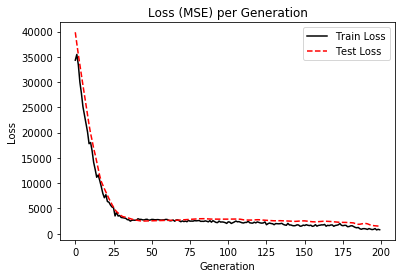

In [37]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()